# Table of Content

1) Import the Libraries

2) Load the Data

3) Cleaning the Data

4) Categorical Analysis

5) Numerical Analysis

6) Conclusion

## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Load the Data

In [2]:
data=pd.read_csv('insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Cleaning the Data

Check for null values:

In [3]:
df=data.copy()

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- We have no **null** values

Check for duplicated rows:

In [4]:
df.duplicated().sum()

1

- We have one **duplicated** value wich needs to be droped.

In [5]:
df.drop_duplicates(inplace=True)

Checking invalid data:

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


## Categorical Analysis

In [7]:
cat_features=df.select_dtypes(include=object).columns

Check unique values of each category: 

In [8]:
for i in cat_features:
    print(f'{i}: {df[i].nunique()}\n{df[i].unique()}\n')
    

sex: 2
['female' 'male']

smoker: 2
['yes' 'no']

region: 4
['southwest' 'southeast' 'northwest' 'northeast']



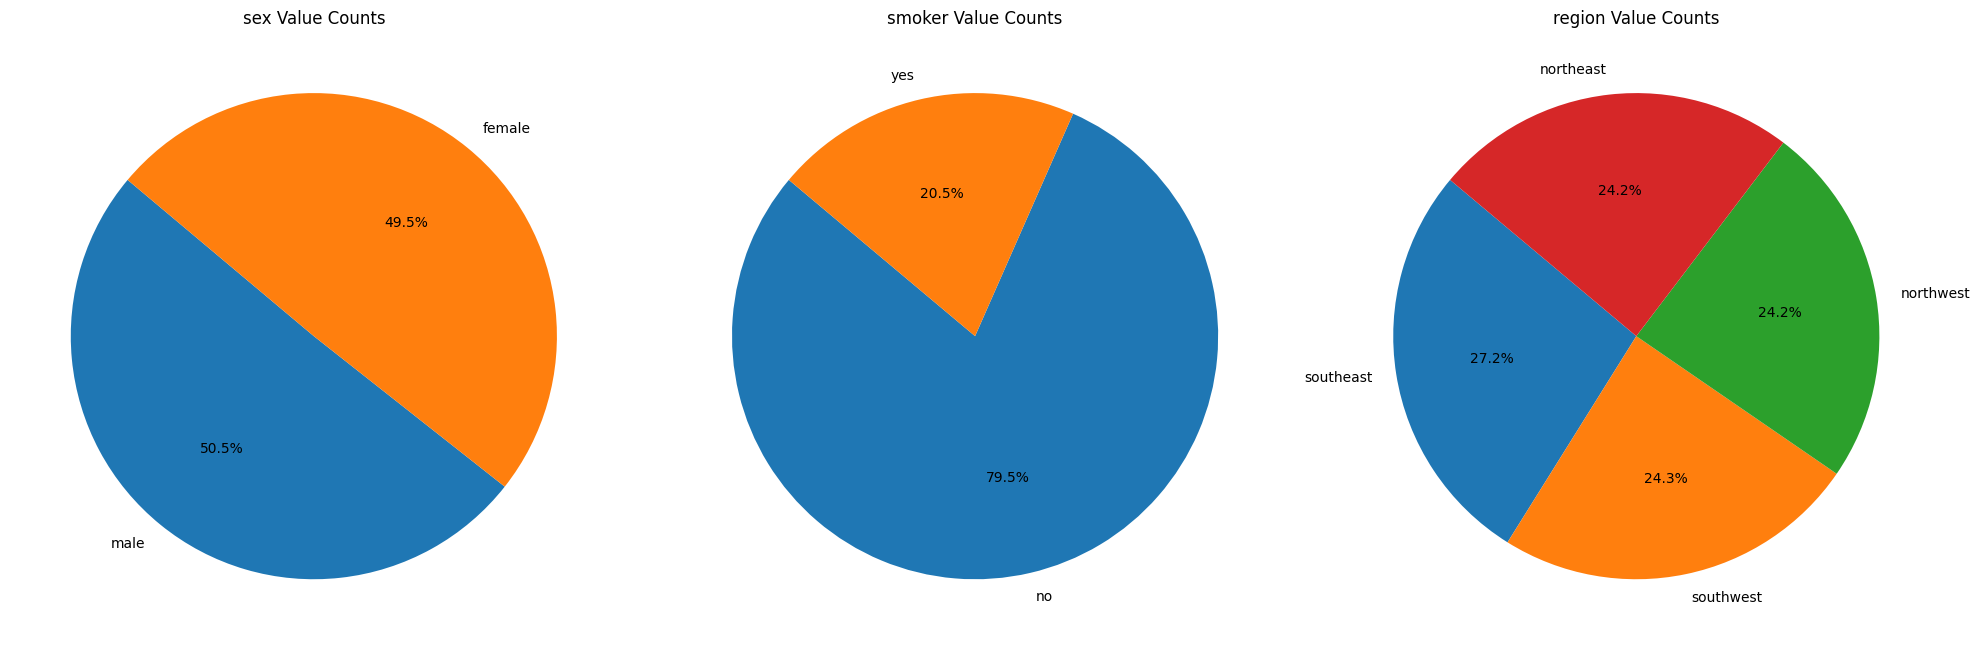

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(20,8))
axes = axes.flatten()  # Flatten for easy iteration

for i, col in enumerate(cat_features):
    ax = axes[i]
    count = df[col].value_counts()

    ax.pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{col} Value Counts')  # Use col instead of i for correct feature labeling

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


- The distribution of **male** and **female** individuals is nearly equal.
- Approximately **20%** of the population consists of **smokers**.
- The distribution of individuals across different **regions** is fairly uniform, though the **southeast** has around **3% more** than the others.


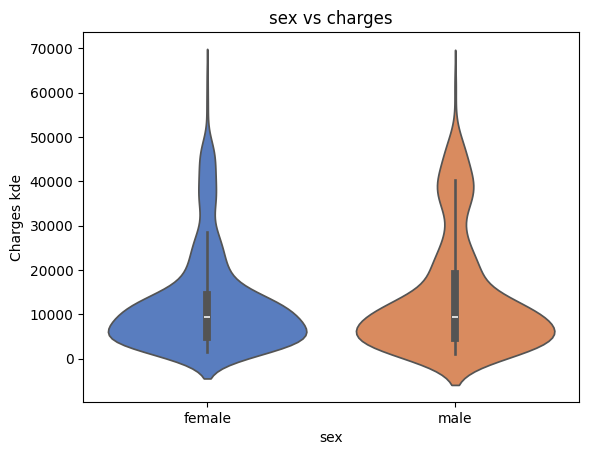

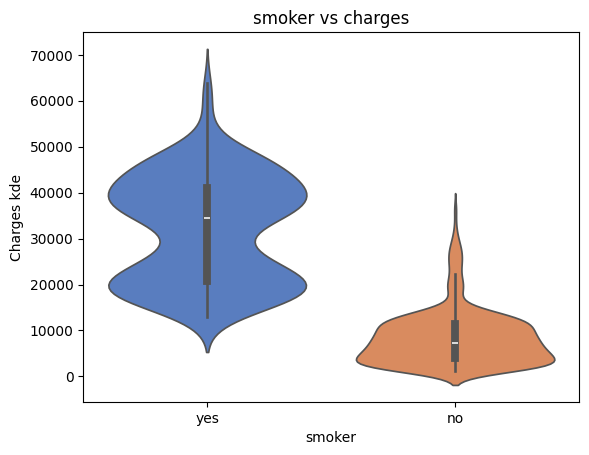

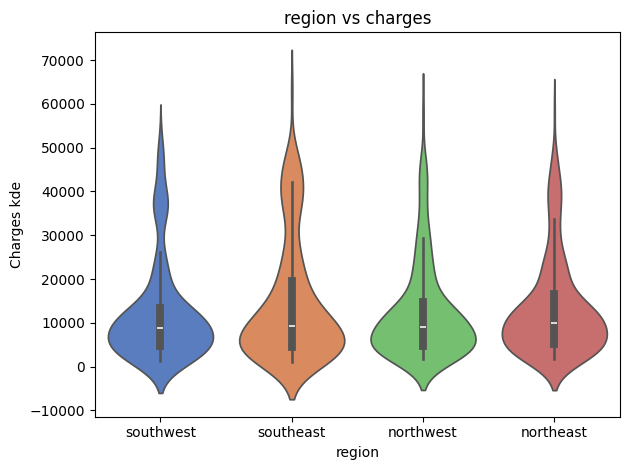

In [10]:
for i in cat_features:
    plt.figure()
    sns.violinplot(data=df,x=df[i],y=df['charges'],hue=df[i],palette='muted')
    plt.title(f'{i} vs charges')
    plt.xlabel(i)
    plt.ylabel('Charges kde')
    
plt.tight_layout()
plt.show()

#### 1. Regional Influence on Insurance Charges  
- As **charges increase**, the number of **regions providing insurance coverage narrows**.  
- Higher charge values tend to have **fewer represented regions**, while lower charge values exhibit **a broader regional distribution**.

#### 2. Effect of Smoking on Insurance Charges  
- **Smokers** consistently face significantly **higher insurance charges** compared to **non-smokers**.  
- Insurance charges for **non-smokers** tend to remain within **lower cost ranges**, whereas **smokers** experience notably **higher costs**.

#### 3. Gender Impact on Charges  
- **Males** are more frequently observed in **higher insurance charge ranges** compared to females.  
- This suggests a potential gender-based trend in cost distribution.

## Numerical Analysis

In [11]:
num_features=df.select_dtypes(exclude=object).columns

Check unique values for numerical data:

In [12]:
for i in num_features:
    print(f'{i}: {df[i].nunique()}')

age: 47
bmi: 548
children: 6
charges: 1337


- Both **age** and **number of children** are discrete variables.

Observing discrete values:

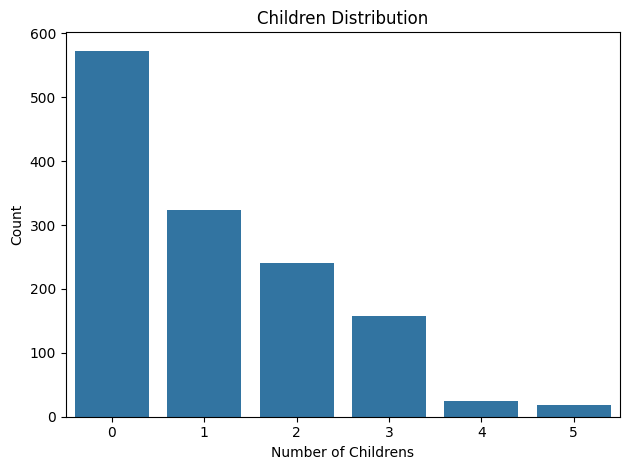

In [13]:
plt.figure()
sns.countplot(data=df,x=df['children'])
plt.title('Children Distribution')
plt.xlabel('Number of Childrens')
plt.ylabel("Count")
plt.tight_layout()
plt.show()

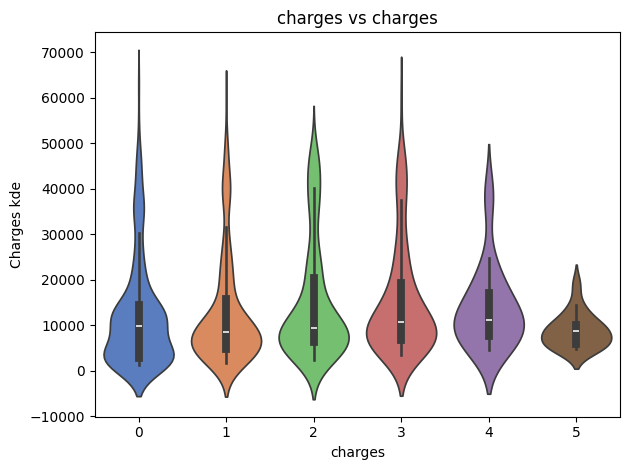

In [14]:
plt.figure()
sns.violinplot(data=df,x=df['children'],y=df['charges'],hue=df['children'],palette='muted',legend=False)
plt.title(f'{i} vs charges')
plt.xlabel(i)
plt.ylabel('Charges kde')
plt.tight_layout()
plt.show()

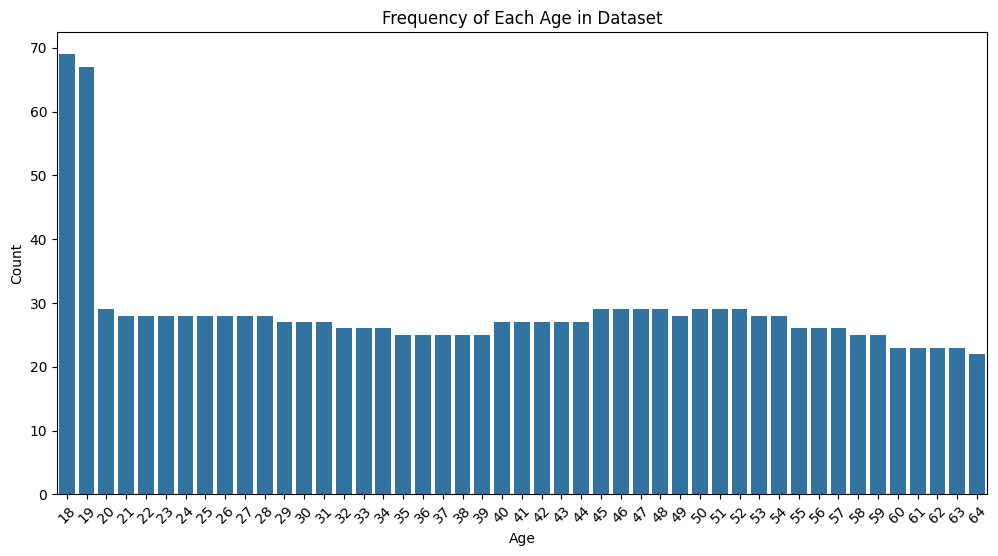

In [15]:
age_counts = df['age'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title("Frequency of Each Age in Dataset")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


#### 1. Distribution of Insurance Coverage by Number of Children  
- The **number of beneficiaries covered by insurance decreases** as the **number of children** increases.  
- The **distribution of individuals with 4 or 5 children covered** is significantly **lower** compared to those with fewer children.

#### 2. Impact of Number of Children on Insurance Charges  
- As the **number of children increases**, the **charges tend to decrease**, except for an anomaly observed at **3 children**, where charges deviate from this trend.  
- The **majority of beneficiaries have zero children covered by insurance**, indicating a preference for individual coverage.

#### 3. Relationship Between Charges and Number of Covered Individuals  
- As **insurance charges increase**, the **number of covered individuals declines**, suggesting that higher-cost plans may be less accessible or preferred.  
- For beneficiaries with **5 children covered**, the **insurance charges remain relatively stable** compared to other groups, deviating from expected trends.

### 4. Age Distribution Analysis

- The **highest frequency of beneficiaries** occurs at ages **18 and 19**, with a significant margin compared to other age groups.
- The distribution of other ages remains **relatively uniform**, without noticeable variations in frequency.
- The dataset **covers ages from 18 to 64**, representing a broad range of insured individuals.

Check the continuous data:

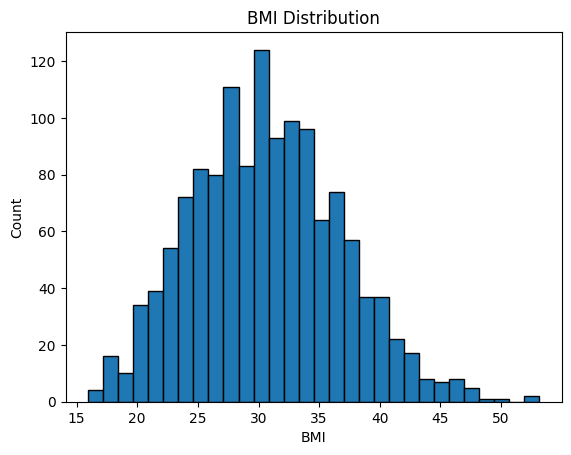

In [16]:
#BMI Distribution
plt.figure()
plt.hist(df['bmi'],bins=30,edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

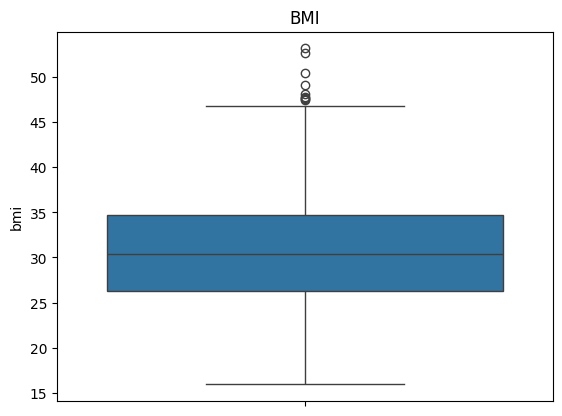

In [17]:
#BMI Outliers
plt.figure()
sns.boxplot(df['bmi'])
plt.title('BMI')
plt.show()

In [18]:
print(f'bmi skewness: {df['bmi'].skew()}')

bmi skewness: 0.28391419385321137


- **Outliers are present** in the column and require appropriate handling to ensure accurate analysis.
- The overall **data distribution does not exhibit skewness**, indicating a relatively balanced spread of values.

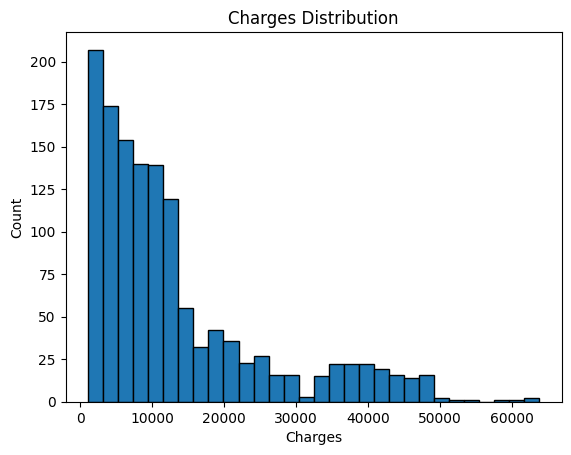

In [19]:
#BMI Distribution
plt.figure()
plt.hist(df['charges'],bins=30,edgecolor='black')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

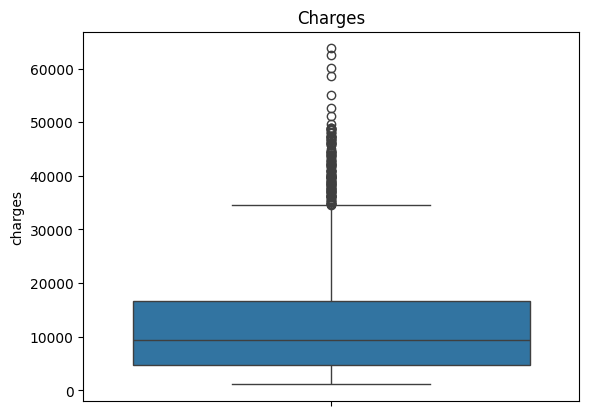

In [20]:
#BMI Outliers
plt.figure()
sns.boxplot(df['charges'])
plt.title('Charges')
plt.show()

In [21]:
print(f'Charges skewness : {df['charges'].skew()}')

Charges skewness : 1.5153909108403483


- **Noticeable outliers** are present in the columns, particularly in **high values of insurance charges**.
- The data exhibits **moderate right-skewness**, indicating that higher charge values occur **less frequently** but extend significantly beyond the central distribution.

Encoding categorical data to detect Correlations:

In [22]:
ordinal_encoder=OrdinalEncoder()
cat_encoded=ordinal_encoder.fit_transform(df[['sex','smoker','region']])
cat_encoded_df=pd.DataFrame(cat_encoded,columns=ordinal_encoder.get_feature_names_out(),index=df.index)


encoded_df=pd.concat([df.drop(columns=['sex','smoker','region']),cat_encoded_df],axis=1)
encoded_df.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0.0,1.0,3.0
1,18,33.770,1,1725.55230,1.0,0.0,2.0
2,28,33.000,3,4449.46200,1.0,0.0,2.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0


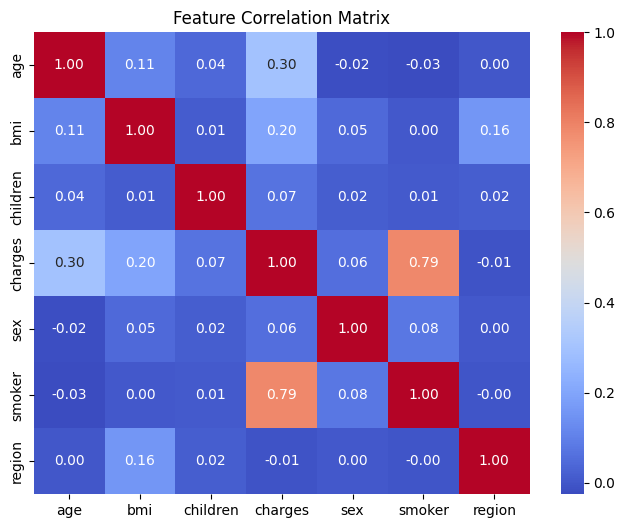

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(encoded_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

- As we can see, there is **no noticeable relationship** between the non-target features. This suggests that **bivariate analysis is unnecessary**, as it would not provide meaningful insights or significant correlations.

## Conclusion

### **1. Gender & Smoking Distribution**
The dataset exhibits a **balanced distribution of male and female beneficiaries**. Approximately **20% of individuals are smokers**, a factor that strongly influences insurance charges.

### **2. Regional Distribution**
The distribution of individuals across **different regions** is fairly uniform, with a slight increase (**~3%**) in representation from the **southeast** compared to other regions.

### **3. Impact of Smoking on Insurance Charges**
Smoking is a **significant determinant** of insurance costs, with **smokers consistently incurring higher charges** than non-smokers, reinforcing the well-established health risks associated with smoking.

## **4. Insurance Coverage Trends Based on Children**
- The **number of beneficiaries covered by insurance declines** as the **number of children increases**, suggesting that larger families may opt for different coverage plans.
- Individuals with **4 or more children** are substantially less frequent in the dataset, indicating a preference for **smaller household coverage**.
  
### **5. Influence of Children on Insurance Charges**
- Insurance charges **generally decrease** with more children, except for an **anomalous increase at 3 children** where the trend deviates.
- Most insured individuals **do not have children covered**, implying a tendency toward **individual coverage plans** over family plans.

### **6. Relationship Between Charges & Number of Covered Individuals**
- A **negative correlation exists** between **insurance charges and the number of covered individuals**, suggesting higher-cost plans might be **less accessible or preferred**.
- For beneficiaries with **five children covered**, the **insurance charges remain relatively stable**, deviating from expected patterns.

### **7. Age Distribution Insights**
- The dataset **primarily consists of younger beneficiaries**, with **ages 18 and 19** being the most frequent.
- Beyond this, **age distribution remains relatively uniform**, indicating **consistent representation across different age groups**.
- The dataset covers individuals from ages **18 to 64**, providing a broad view of insured individuals.

### **8. Bivariate Analysis Decision**
There is **no significant relationship between non-target features**, making **bivariate analysis unnecessary**. Instead, future analysis may focus on **univariate trends and predictive modeling**.

### **Final Thoughts**
This analysis provides insights into **key demographic trends**, **smoking impact on charges**, and **family-based insurance patterns**. Future investigations could explore **predictive models** to optimize risk assessment and cost forecasting.
